<h2> Nauczanie maszynowe/Ćwiczenia5

<h1>Grupowanie danych. K-means

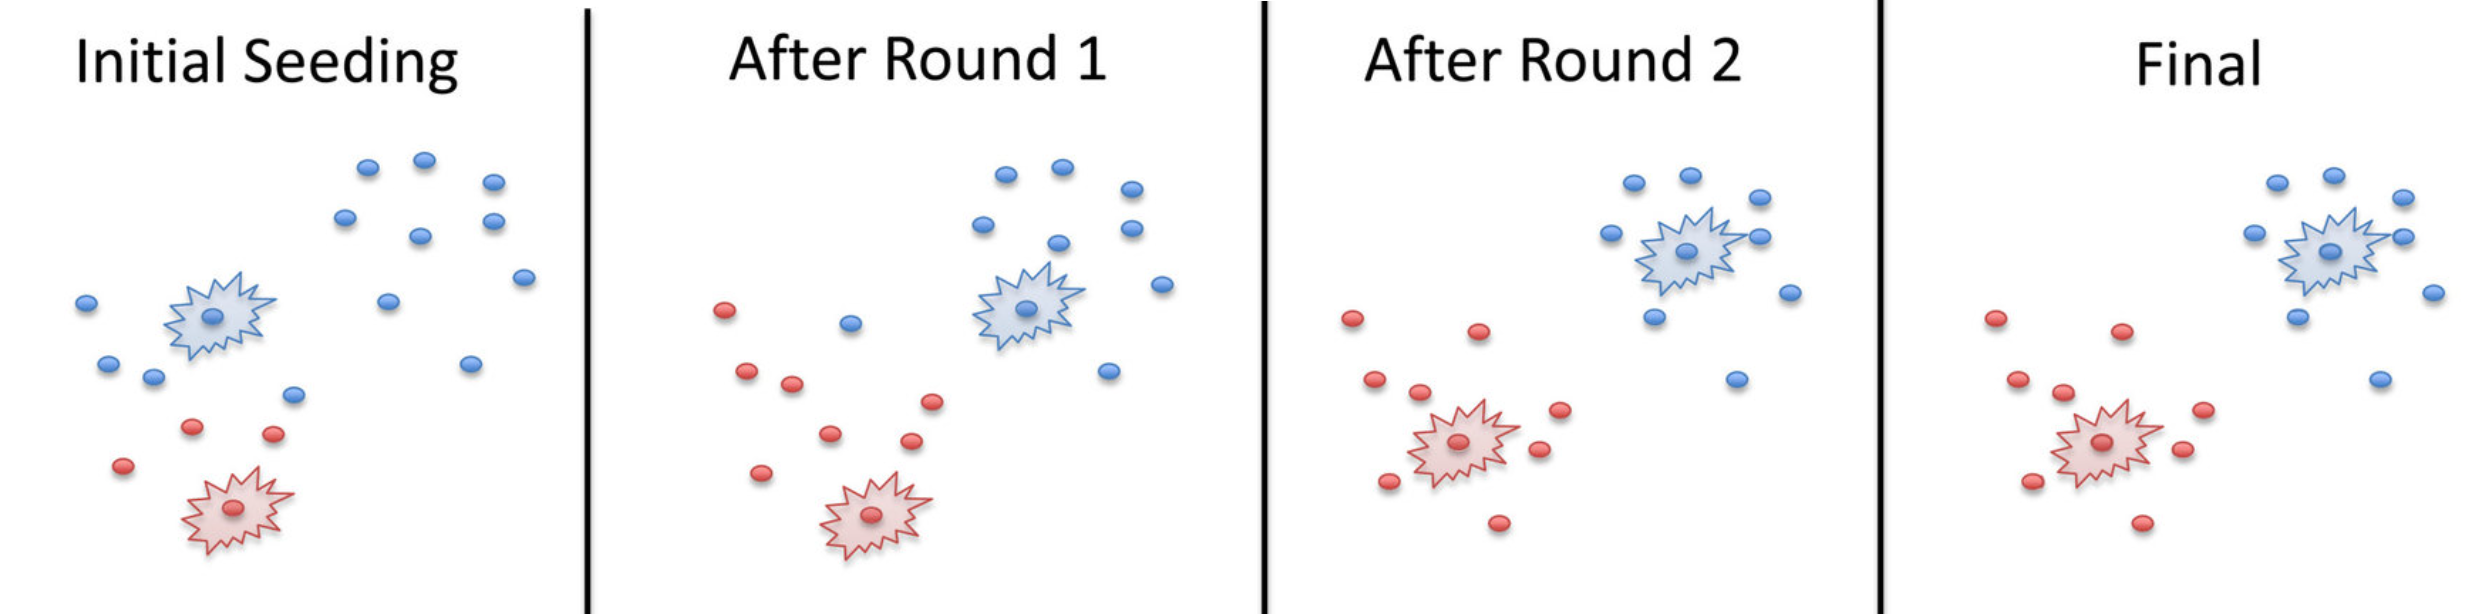

In [ ]:
from IPython import display
display.Image("kmeans.png", width="1200", height="700")

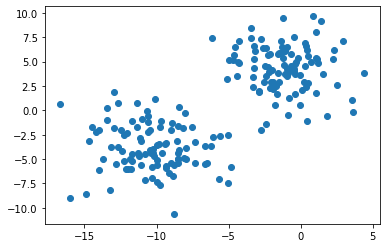

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=200, random_state=1, n_features=2, centers = 2, cluster_std = 2.4)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2) #dane grupujemy w 2 populacje
kmeans.fit(X);

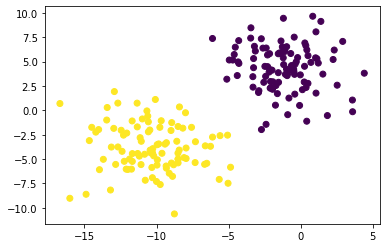

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show()

In [ ]:
kmeans.cluster_centers_ #gdzie są srodki

array([[ -1.17963243,   4.34587916],
       [-10.27744713,  -3.83271163]])

<h4> Co gdy nie wiemy ile grup?

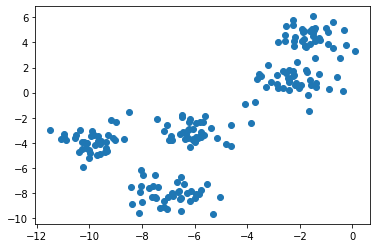

In [ ]:
X, y = make_blobs(n_samples=200, random_state=1, n_features=2, centers = 5, cluster_std = 0.8)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

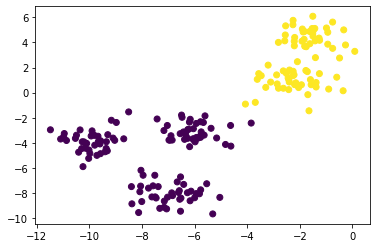

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show()

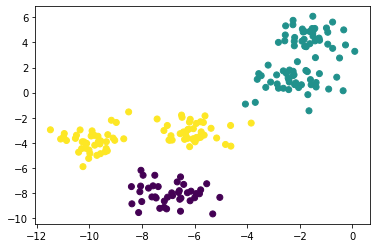

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show()

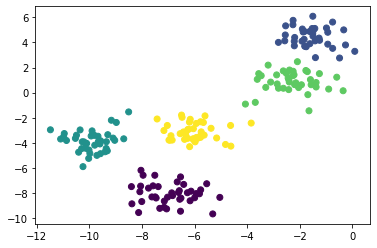

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

def AIC(X, k):
    gmm = GaussianMixture(n_components=k, init_params='kmeans')
    gmm.fit(X)
    return gmm.aic(X);

def BIC(X, k):
    gmm = GaussianMixture(n_components=k, init_params='kmeans')
    gmm.fit(X)
    return gmm.bic(X);

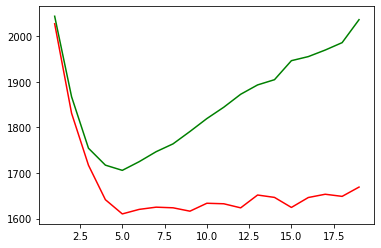

In [ ]:
aic = []
bic = []

for i in range(1, 20):
    a, b = AIC(X,i), BIC(X,i)
    aic.append(a)
    bic.append(b)
    
plt.plot(range(1,20), aic, c = "red")
plt.plot(range(1,20), bic, c = "green")

plt.show()
    

<h4> Przykład1: Grupowanie cyfr

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape #1797 probek, zdjecia 8 na 8

(1797, 64)

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
kmeans = KMeans(n_clusters = 10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape) #10 klastroe 64D

(10, 64)


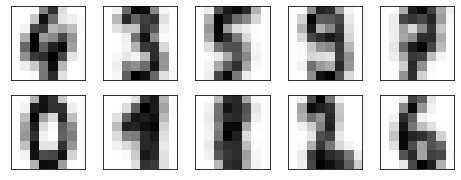

In [ ]:
#jak wygladają te centra? Z ktorą cyfra moze byc problem? (8)

fig, ax = plt.subplots(2, 5, figsize = (8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation = "nearest", cmap = plt.cm.binary)

In [ ]:
clusters == 1

array([False, False, False, ..., False, False, False])

In [ ]:
#bo kmeans arbitralnie nadaje nazwy grupom, nie koniecznie grupa 0 reprezentuje zera

from scipy.stats import mode
import numpy as np

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(digits.target, labels)

0.7935447968836951

Text(83.40000000000006, 0.5, 'predicted label')

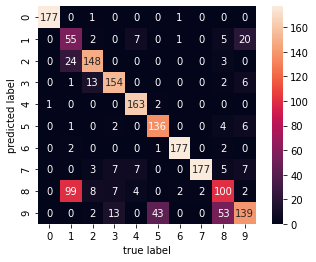

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = True,
            xticklabels = digits.target_names,
            yticklabels = digits.target_names)

plt.xlabel("true label")
plt.ylabel("predicted label")
            

<h4> Przykład2: Kompresja obrazu

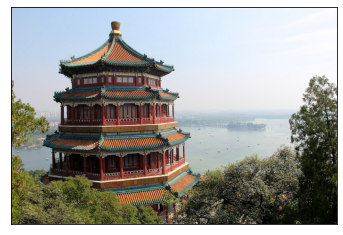

In [ ]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china);

In [ ]:
china.shape #wysokosc/szerokosc/RGB - wplyw czerwonego/niebieskiego/zielonego w skali od 0 do 255

(427, 640, 3)

In [ ]:
data = china/255 #skalujemy do 0,1
data = data.reshape(427*640, 3)
data.shape #kazdy piksel charakeryzuje sie 3 liczbami

(273280, 3)

In [ ]:
data[0] #przyklad

array([0.68235294, 0.78823529, 0.90588235])

In [ ]:
256*256*256 #tyle jest wszystkich mozliwych kolorow, zredukujmy te liczbe do 16 dla naszego zdjecia

16777216

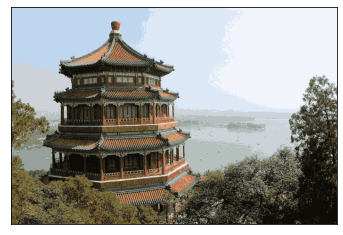

In [ ]:
kmeans = KMeans(n_clusters=16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
china_recolored = new_colors.reshape(china.shape) #wracamy do orginalnych wymiarow

ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china_recolored);

<h4> Niekuliste kształty

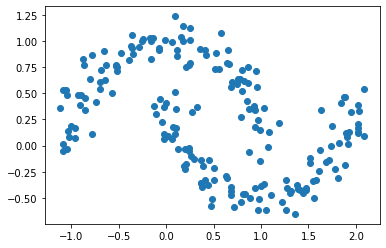

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=.1, random_state=41)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

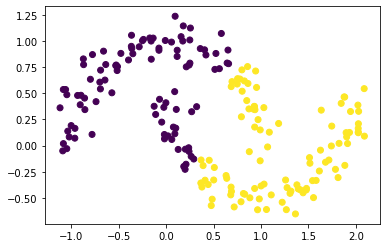

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show() #nie tego bysmy oczekiwali

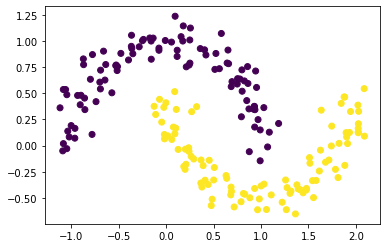

In [ ]:
#algorytm DBSCAN 

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.22, min_samples=2)
db.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=db.labels_)
plt.show()

<h4> Zadanie1: Zaimplementuj algorytm grupowania górskiego Zastosuj do poniższych danych.

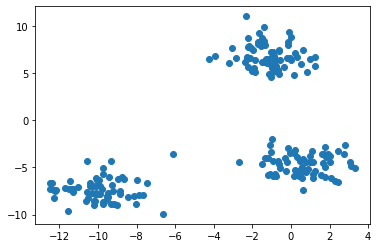

AttributeError: ignored

In [ ]:
# Zadanie1: Zaimplementuj algorytm grupowania górskiego Zastosuj do poniższych danych.
# moje rozwiązanie 

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import math

X, Y = make_blobs(n_samples=200, random_state=100, n_features=2, centers = 3, cluster_std = 1.2)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

################

# assign initial parameters, circle radius size and inputs
class mountain_clustering:

    def __init__(self, x, radius):
        self.data = x
        self.radius = radius
        self.y = [0]*len(x[:, 0])
        self.density = self.calculate_density(self.data, self.y, self.radius)
        self.currentCluster = 0


    def calculate_density(self, x, y, radius):
        """determine density for each point by counting distance to other points
        (yes, this is slow and inefficient for large datasets)"""

        density = []
        for main_idx, pair in enumerate(x[:,0]):
            density_score = 0
            for sub_idx, ele in enumerate(x[:,0]):
                distance = (math.dist((x[main_idx, 0], x[main_idx, 1]), (x[sub_idx, 0], x[sub_idx, 1])))
                if distance < radius and y[sub_idx] == 0:
                    density_score += 1
            density.append(density_score)
        return density

    def classify_radius(self, x, density):
        """Classifies samples around the most dense point based on radius"""

        self.currentCluster += 1
        dense_idx = density.index(max(density))
        # if distance to max_dense is lower than radius, and point isn't classified yet, classify it
        for idx, pair in enumerate(x[:, 0]):
            if self.y[idx] == 0:
                distance = math.dist((x[dense_idx, 0], x[dense_idx, 1]), (x[idx, 0], x[idx, 1]))
                if distance < self.radius:
                    self.y[idx] = self.currentCluster
        self.density = self.calculate_density(self.data, self.y, self.radius)


A = mountain_clustering(X, 4)

LABEL_COLOR_MAP = {0: 'r',
                   1: 'k',
                   2: 'b',
                   3: 'g'}

plt.scatter(X[:, 0], X[:, 1], c=[LABEL_COLOR_MAP[l] for l in A.y])
plt.show()

A.classify_radius(A.data, A.density)

plt.scatter(X[:, 0], X[:, 1], c=[LABEL_COLOR_MAP[l] for l in A.y])
plt.show()

A.classify_radius(A.data, A.density)

plt.scatter(X[:, 0], X[:, 1], c=[LABEL_COLOR_MAP[l] for l in A.y])
plt.show()

A.classify_radius(A.data, A.density)

plt.scatter(X[:, 0], X[:, 1], c=[LABEL_COLOR_MAP[l] for l in A.y])
plt.show()

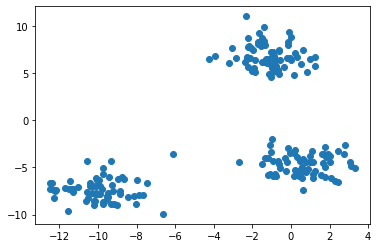

In [ ]:
X, y = make_blobs(n_samples=200, random_state=100, n_features=2, centers = 3, cluster_std = 1.2)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

Idea grupowania górskiego

Text(0.5, 0.92, 'surface')

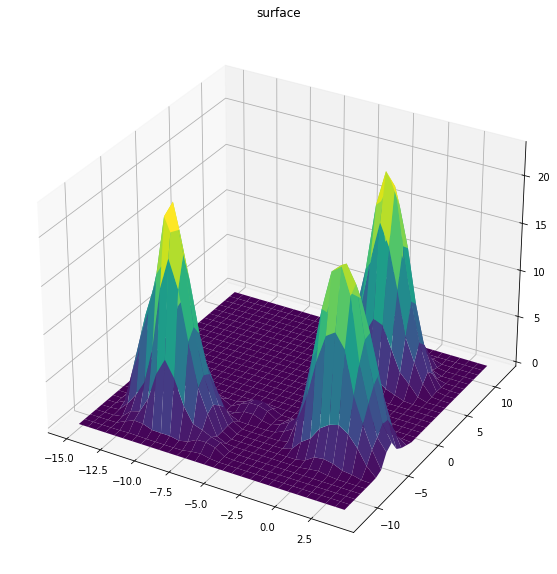

In [ ]:
#dane w funkcji gęstosci

Text(0.5, 0.92, 'surface')

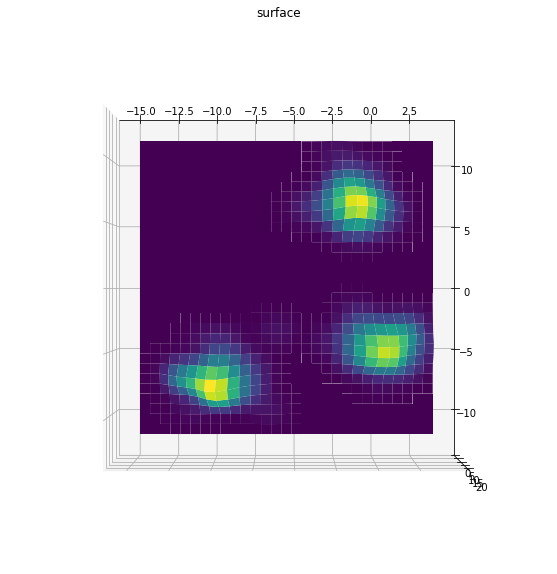

In [ ]:
#rzut z gory

Text(0.5, 0.92, 'surface')

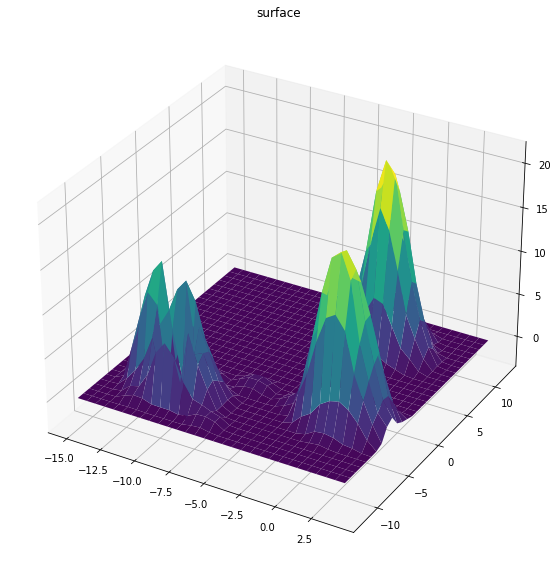

In [ ]:
#lokalizujemy najwyzszy punkt --> to będzie pierwsze centrum; obcinamy te górke

Text(0.5, 0.92, 'surface')

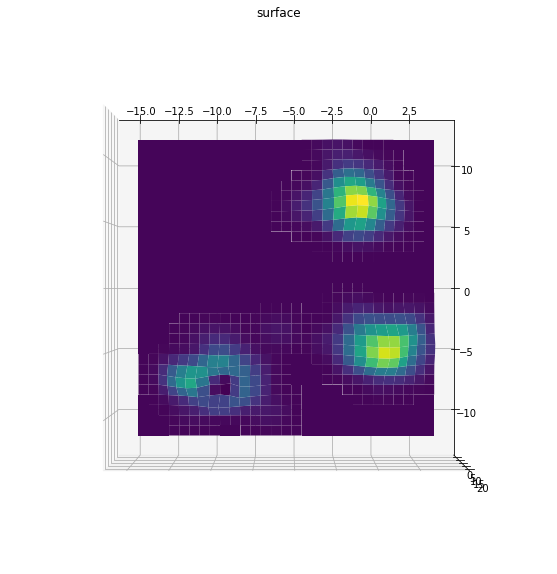

In [ ]:
#rzut z gory

Text(0.5, 0.92, 'surface')

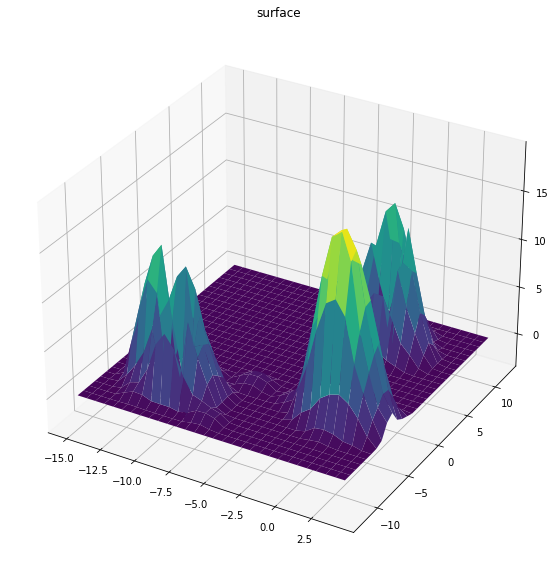

In [ ]:
#analogicznie szukamy drugiego centrum

Text(0.5, 0.92, 'surface')

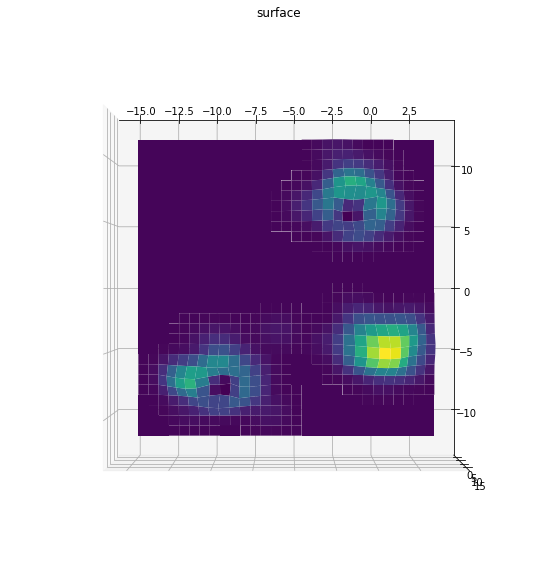

In [ ]:
#rzut z gory

Text(0.5, 0.92, 'surface')

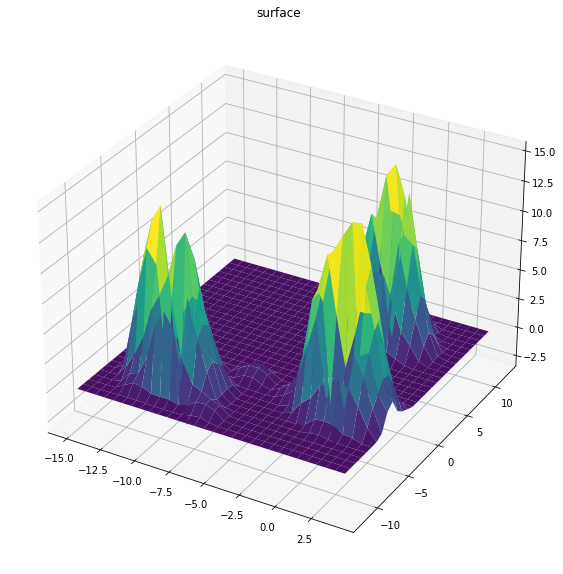

In [ ]:
#szukamy trzeciego centrum

Text(0.5, 0.92, 'surface')

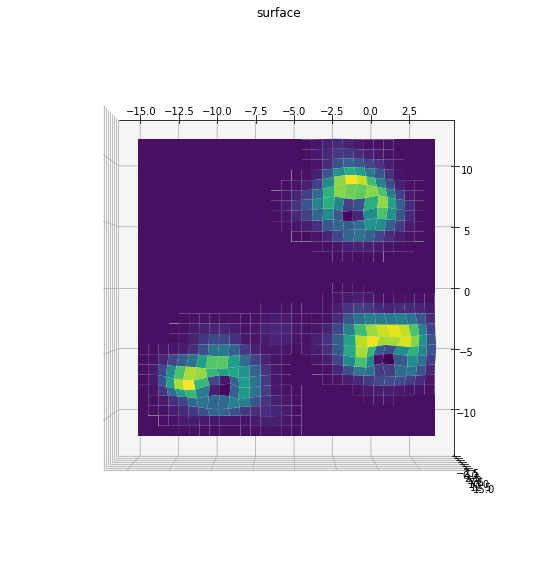

In [ ]:
#rzut z gory --> mamy wszystkie centra

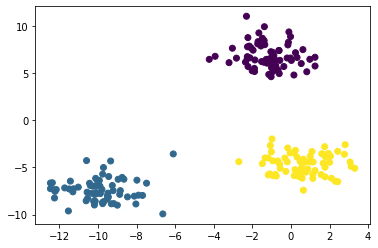

In [ ]:
#przypisujemy przynaleznosc punktow 

**<h4> Zadanie2: Zaimplementuj algorytm Gustafsona-Kessela. Zastosuj go do poniższych danych - algorytm powinien sobie poradzić z poprawną klasyfikacją.**

In [4]:
# w tym zadaniu korzystałam z pomocy internetowej - oto źródło: https://www.youtube.com/watch?v=qeTHTOrH46o&ab_channel=wiqaaas, rozumiem ideę samego algorytmu, ale pomimo prób interpretacji różnymi 
# sposobami i po przeczytaniu informacji zawartych w książce nadal miałam niemały problem z zaimplementowaniem algorytmu, w związku z tym zdecydowałam się na poszukanie pomocy na YT i znalazłam następujący kod. 
#Rozumiem ideę, ale zacięłam się przy implementacji, więc wklejam algorym, który niestety działa tylko do jednej klasy. 

class Fuzzy_Clustering:
    def __init__(self, n_clusters=2, max_iter=150, fuzzines=2, error=1e-5, random_state=42, dist="euclidean", method="Cmeans"):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.fuzzines = fuzzines
        self.error = error
        self.random_state = random_state
        self.dist = dist
        self.method = method
        
    def fit(self, X):
        memberships = self._init_mem(X)
              
        iteration = 0
        while iteration < self.max_iter:
            membershipsNew = deepcopy(memberships)
            new_class_centers = self._update_centers(X, memberships)
            distance = self._calculate_dist(X,memberships,new_class_centers)
            memberships = self._update_memberships(X, memberships, new_class_centers, distance)
            iteration += 1
            if norm(memberships - membershipsNew) < self.error:
                break
            
        return memberships, new_class_centers

        def _init_mem(self,X):
        n_samples = X.shape[0]
        n_clusters = self.n_clusters

        #initialize memberships
        rnd = np.random.RandomState(self.random_state)
        memberships = rnd.rand(n_samples,n_clusters)

        #update membership relative to classes
        summation = memberships.sum(axis=1).reshape(-1,1)
        denominator = np.repeat(summation,n_clusters,axis=1)
        memberships = memberships/denominator
        
        return memberships

    def _update_centers(self, X, memberships):
        fuzzyMem = memberships ** self.fuzzines
        new_class_centers = (np.dot(X.T,fuzzyMem)/np.sum(fuzzyMem,axis=0)).T
        return new_class_centers
    
    def _calculate_fuzzyCov(self,X,memberships,new_class_centers):
        #calculating covariance matrix in its fuzzy form  
        fuzzyMem = memberships ** self.fuzzines
        n_clusters = self.n_clusters
        FcovInv_Class = []
        dim = X.shape[1]
        for i in range(n_clusters): 
            diff = X-new_class_centers[i]
            left = np.dot((fuzzyMem[:,i].reshape(-1,1)*diff).T,diff)/np.sum(fuzzyMem[:,i],axis=0)
            Fcov = (np.linalg.det(left)**(-1/dim))*left
            FcovInv = np.linalg.inv(Fcov)
            FcovInv_Class.append(FcovInv)
        return FcovInv_Class

    def _calculate_dist(self,X,memberships,new_class_centers):

    if self.method == "Gustafson–Kessel":
            n_clusters = self.n_clusters
            FcovInv_Class = self._calculate_fuzzyCov(X,memberships,new_class_centers)

            #calculating mahalanobis distance
            mahalanobis_Class = []
            for i in range(n_clusters): 
                diff = X-new_class_centers[i]
                left = np.dot(diff,FcovInv_Class[i])    
                mahalanobis = np.diag(np.dot(left,diff.T))
                mahalanobis_Class.append(mahalanobis)
            distance = np.array(mahalanobis_Class).T
            return distance
        
        elif self.method == "Cmeans":
            distance = cdist(X, new_class_centers,metric=self.dist)
            return distance

    def _update_memberships(self, X, memberships, new_class_centers, distance):
        fuzziness = self.fuzzines
        n_clusters = self.n_clusters
        n_samples = X.shape[0]
        
        power = float(2/(fuzziness - 1))
        distance = distance**power
        arr = np.zeros((n_samples,n_clusters))
        for i in range(n_clusters):
            for ii in range(n_clusters):
                arr[:,ii] = ((distance[:,i]/distance[:,ii]))
            memberships[:,i] = 1/np.sum(arr,axis=1)   
        return memberships

        Fclustering = Fuzzy_Clustering(method="Gustafson–Kessel",n_clusters = 4)
memberships, classCenters = Fclustering.fit(X)
fig = plt.subplots()
plt.scatter(X[:,0], X[:,1], c=memberships[:,0], marker = "x")

IndentationError: ignored

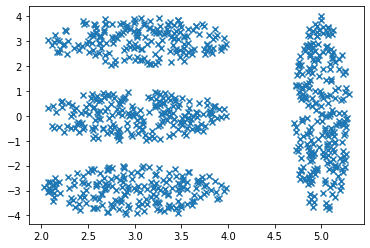

In [ ]:

n = 10000
x = np.random.uniform(-6, 6, n)
y = np.random.uniform(-6, 6, n)

x1 = []
y1 = []
for i in range(n):
    if ((x[i]-5)**2)/0.3**2+((y[i]-0)**2)/4**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-3)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-0)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]+3)**2)/1**2 <=1:
        x1.append(x[i])
        y1.append(y[i])
X = np.array([[x,y] for (x,y) in zip(x1,y1)])

plt.scatter(X[:,0],X[:,1], marker = "x")
plt.show()

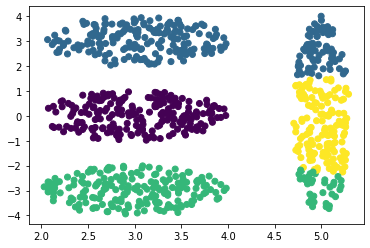

In [ ]:
#dla porownania K-means, ktory ma problem z tego typu danymi

kmeans = KMeans(n_clusters=4)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show() 

In [ ]:
## implementacja algorytmu Gustafsona-Kessela



<h3> Uzupełnienie (grupowanie hierarchiczne)

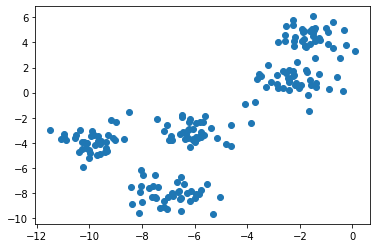

In [ ]:
X, y = make_blobs(n_samples=200, random_state=1, n_features=2, centers = 5, cluster_std = 0.8)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

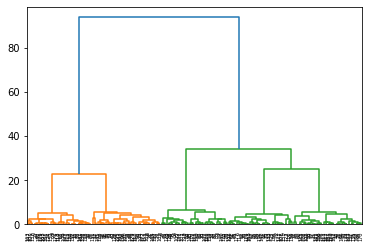

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(X, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

<h4> Ćwiczenie: Jakie są inne warianty dla metody i metryki? Zapisz wzory, przetestuj, porównaj.

<h3> Uzupełnienie (numpy)

In [ ]:
import numpy as np

v = np.array([3,0,-4])
np.linalg.norm(v) #dlugosc wektora

5.0

In [ ]:
A = np.array([[1,0,2],[3,-1,0]])
B = np.array([[1,2],[4,-1],[5,6]])

In [ ]:
np.dot(A,B) #mnozenie macierzowe

array([[11, 14],
       [-1,  7]])

In [ ]:
A = np.array([[1,2],[3,0]])

np.linalg.inv(A) #macierz odwrotna

array([[ 0.        ,  0.33333333],
       [ 0.5       , -0.16666667]])

In [ ]:
np.linalg.det(A) #wyznacznik macierzy

-6.0

In [ ]:
np.sum(A) #suma wszystkich elementowe

6

In [ ]:
np.sum(A, axis=0) #suma w kolumnach

array([4, 2])

In [ ]:
np.sum(A, axis=1) #suma w wierszach

array([3, 3])